# CHURN_DATASET_ANAYLISIS

Name:Omkar G Beloshe

## 1.Importing Neccesary Liberies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",50)
import matplotlib.ticker as mtick 

## 2.Loading Dataset

In [3]:
churn_analysis=pd.read_csv("Data.csv")
churn_analysis.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Understanding Data

In [4]:
churn_analysis.shape

(7043, 21)

In [5]:
churn_analysis.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
churn_analysis.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After describing, The average 'tenure' is 32 Months & average 'MonthlyCharges' is 64.76/-.
On this dataset, The 75% customer's 'tenure' is 55 Months. Who pays 'MonthlyCharges' of 89.85/-

In [7]:
churn_analysis.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 4. Data cleaning:

Finding Null Values

In [8]:
churn_analysis.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here dataset shows 0 NULL values but remember that 95% of columns datatype is <object>.
Lets first convert the data column into suitable datatype then find NULL values again.

In [9]:
churn_analysis.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In this following dataset we need 'TotalCharges' column to find NULL values.

In [10]:
churn_analysis['TotalCharges'] = pd.to_numeric(churn_analysis['TotalCharges'], errors = 'coerce')

In [11]:
churn_analysis.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dropping NULL values of 'TotalCharges' column:

In [12]:
churn_analysis.dropna(axis = 0, subset = ['TotalCharges'], inplace =True)

In [13]:
churn_analysis.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Dropping unnacessary columns:

According to my analysis this 3 columns have zero information gain about dataset

In [14]:
churn_analysis.drop(axis = 1, columns = ['customerID', 'Dependents', 'Partner'], inplace = True)

In [15]:
churn_analysis.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 5. EDA 

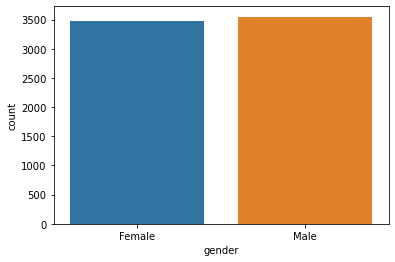

In [16]:
fig, a = plt.subplots(figsize=(6,4))
a = sns.countplot(churn_analysis['gender'])

 In this following dataset,
    we can see the ratio of male and female, on the dataset male users are more than female users.

<AxesSubplot:xlabel='Churn', ylabel='count'>

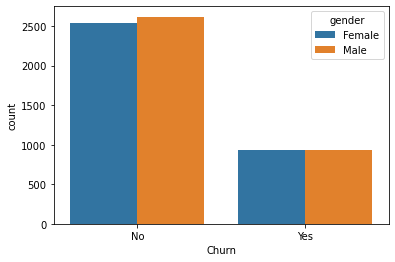

In [17]:
sns.countplot(x='Churn',data=churn_analysis,hue='gender')

In above insight we can say that the gender is not the factor for churn as 
      the numbers of both the gender are almost same .

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

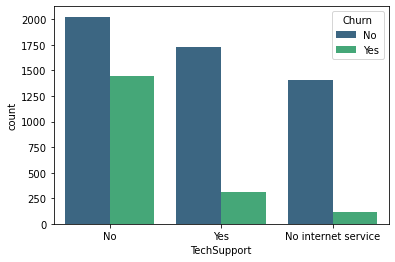

In [18]:
sns.countplot(x='TechSupport',data=churn_analysis,hue='Churn',palette='viridis')

Insight: 
    Those customers who dont have tech support have churned more

<AxesSubplot:xlabel='Churn', ylabel='count'>

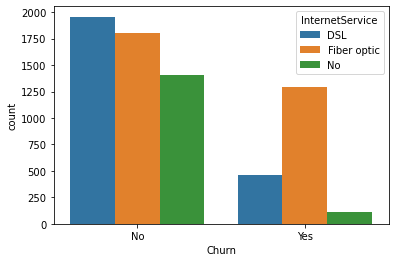

In [19]:
sns.countplot(x='Churn',data=churn_analysis,hue='InternetService')

Insight:
    As we can see that people using Fiber Optic services have a higher churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

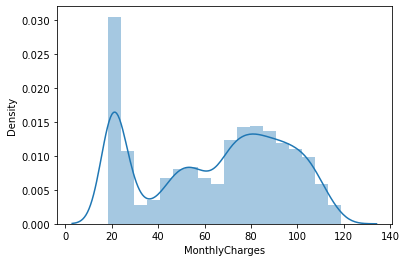

In [20]:
sns.distplot(churn_analysis['MonthlyCharges'])

 By The following 
    Distribution plot of 'MonthlyCharges' we can say that most of the users are paying 20/- monthly charges

# Churn Distribution

In [21]:
churn_analysis['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

For Further analysis we have seen a count of Churn

In [22]:
100*churn_analysis['Churn'].value_counts()/len(churn_analysis['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

Percentage of Yes and NO in Churn 

In [23]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

churn_analysis['tenure_group'] = pd.cut(churn_analysis.tenure, range(1, 80, 12), right=False, labels=labels)

In [24]:
churn_analysis.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


As we can see the the Tenure is high in a group of 1-12

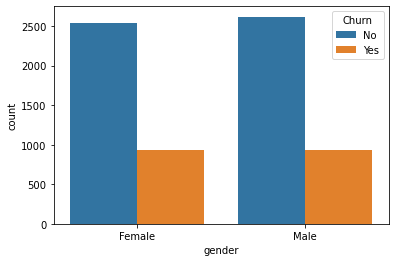

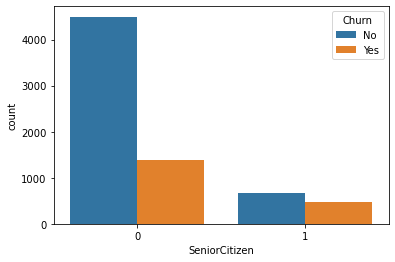

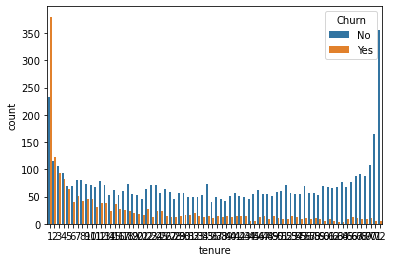

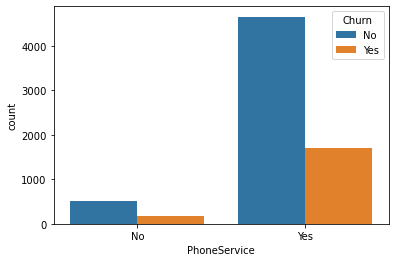

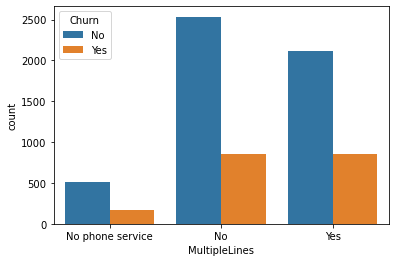

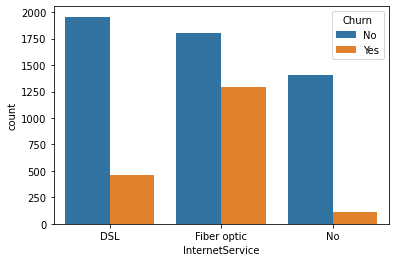

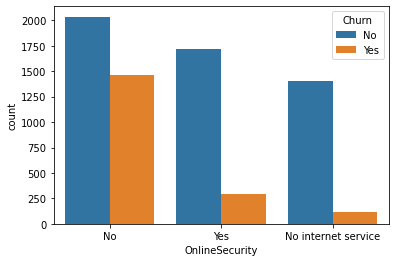

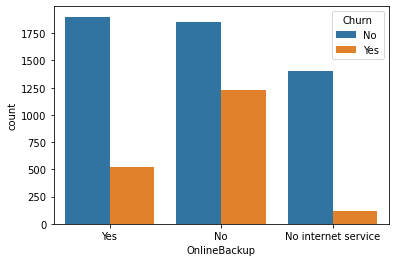

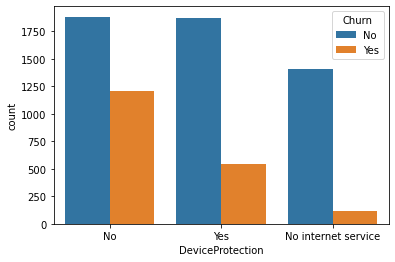

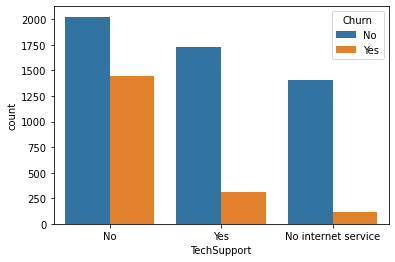

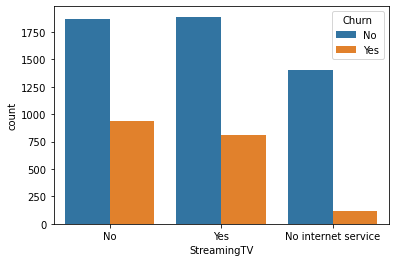

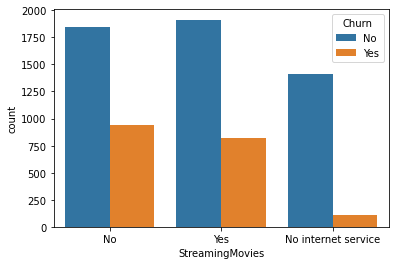

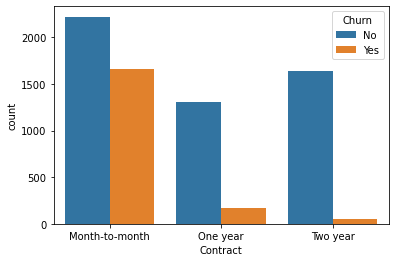

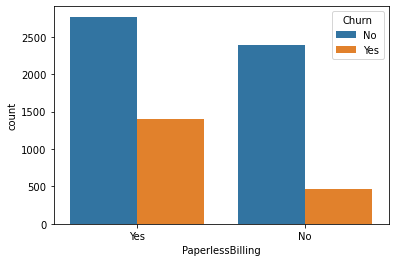

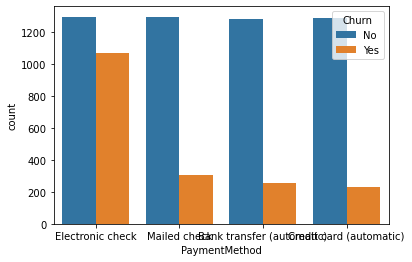

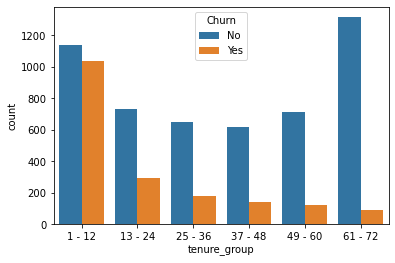

In [25]:
for i, predictor in enumerate(churn_analysis.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churn_analysis, x=predictor, hue='Churn')

# Convert 'Churn (Categorical)' column into binary data.

In [26]:
churn_analysis_2 = churn_analysis.copy(deep = True)

In [27]:
churn_analysis_2['Churn'] = np.where(churn_analysis_2['Churn'] == 'Yes', 1, 0)
churn_analysis_2.head(20)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
6,Male,0,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,13 - 24
7,Female,0,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,1 - 12
8,Female,0,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
9,Male,0,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,61 - 72


Text(0.5, 1.0, 'Monthly charges by churn')

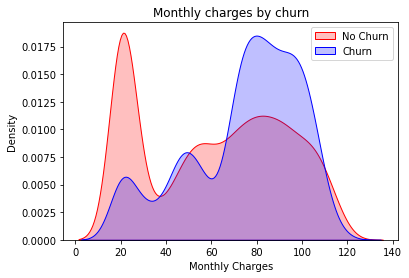

In [28]:
Mth = sns.kdeplot(churn_analysis_2.MonthlyCharges[(churn_analysis_2["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(churn_analysis_2.MonthlyCharges[(churn_analysis_2["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges are high Surprising insight as higher Churn at lower Total Charges

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

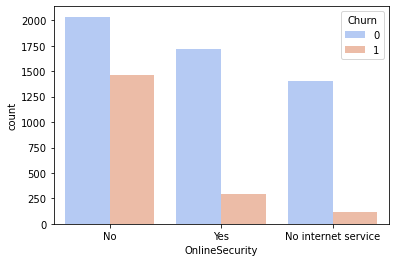

In [29]:
sns.countplot(x='OnlineSecurity',data=churn_analysis_2,hue='Churn',palette='coolwarm')

Insight:
    From the above graph we can see that the Online Security is  major factor for Churn

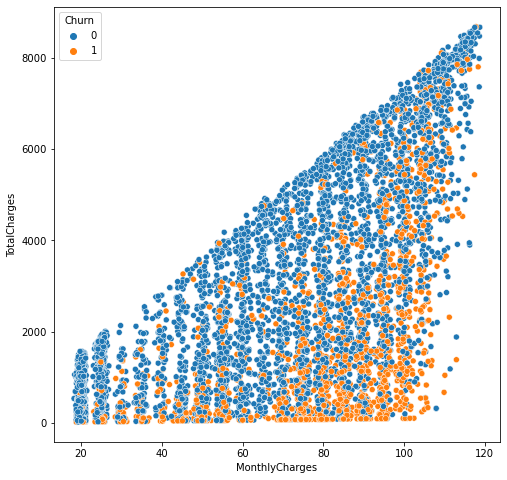

In [30]:
fig, a = plt.subplots(figsize = (8, 8))
a = sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', data = churn_analysis_2)

As MonthlyCharges increases TotalCharges increases

<AxesSubplot:xlabel='Churn', ylabel='count'>

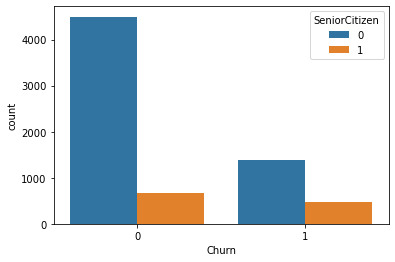

In [31]:
sns.countplot(x='Churn',data=churn_analysis_2,hue='SeniorCitizen')

As we can see that that the SeniorCitizen are not 'High Churners' as compare to others

# Conclusion:

These are some quick insight from the dataset........

1.Those customers who dont have tech support have churned more
2.As we can see that people using Fiber Optic services have a higher churn.
3.According to insight we can say that most of the users are paying 20/- monthly charges
4.Churn is high when Monthly Charges are high Surprising insight as higher Churn at lower Total Charges
5.As we can see that that the SeniorCitizen are not 'High Churners' as compare to others

# 6. Pre-processing

## Categorical data conversion to binary data

Copy data: From Previous Columns ..

In [32]:
churn_analysis_3 = churn_analysis_2.copy(deep = True)
churn_analysis_3

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


## Creating Dummy Data

In [33]:
churn_analysis_3 = pd.get_dummies(churn_analysis_3)
churn_analysis_3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7039,0,72,103.20,7362.90,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7040,0,11,29.60,346.45,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7041,1,4,74.40,306.60,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


## Splitting Data In X And Y Arrays

Assigning X

In [34]:
X = churn_analysis_3.drop('Churn', axis = 1)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7039,0,72,103.20,7362.90,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7040,0,11,29.60,346.45,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7041,1,4,74.40,306.60,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


Assigning Y

In [35]:
y = churn_analysis_3['Churn']

## Train Test Split

Lets split the data into a training set and a testing set

In [36]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

As you can see have split the data in 70% traning and 30 % testing format

# Building Classification Models..

# A. By Building Decision Tree

### Importing Libraries

In [45]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix 


In [49]:
init_dtc = DecisionTreeClassifier()
init_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
dtc_pred = init_dtc.predict(X_test)

In [52]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76      3613
           1       0.27      0.22      0.24      1310

    accuracy                           0.63      4923
   macro avg       0.50      0.50      0.50      4923
weighted avg       0.61      0.63      0.62      4923



In [53]:
print(confusion_matrix(y_test, dtc_pred))

[[2957  656]
 [ 685  625]]


# B. Logistic regression:

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [56]:
predictions[:5]

array([0, 0, 0, 0, 1])

In [57]:
result= confusion_matrix(y_test, predictions) 
result

array([[3259,  354],
       [ 629,  681]], dtype=int64)

In [58]:
accuracy_score(y_test, predictions) 

0.8003250050782044

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3613
           1       0.66      0.52      0.58      1310

    accuracy                           0.80      4923
   macro avg       0.75      0.71      0.72      4923
weighted avg       0.79      0.80      0.79      4923



# C.Random forest:

In [60]:
rfc = RandomForestClassifier(n_estimators=100)

In [61]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
rfc_pred = rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test,rfc_pred))

[[3260  353]
 [ 704  606]]


In [64]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3613
           1       0.63      0.46      0.53      1310

    accuracy                           0.79      4923
   macro avg       0.73      0.68      0.70      4923
weighted avg       0.77      0.79      0.77      4923



### Here, we can see that accuracy is quite low and as it's an imbalance dataset, we shouldn't consider accuracy as our mertics to measure the model.


## Hence, here we're using SMOTEENN  method to get a better accuracy.

## Balancing the data:

### A. Decision tree:

In [66]:
# Importing <SMOTEENN> from <imblearn> module...
from imblearn.combine import SMOTEENN

# Initialization
sm =  SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X, y)

In [68]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.7)

### Model building:

In [70]:
dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)
dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [72]:
dt_smote_pred = dt_smote.predict(xr_test)

In [74]:
dt_r_score = dt_smote.score(xr_test, yr_test)
print('R score :', dt_r_score)

R score : 0.9216354344122658


In [75]:
print(classification_report(yr_test, dt_smote_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1886
           1       0.94      0.91      0.93      2223

    accuracy                           0.92      4109
   macro avg       0.92      0.92      0.92      4109
weighted avg       0.92      0.92      0.92      4109



In [76]:
print(confusion_matrix(yr_test, dt_smote_pred))

[[1759  127]
 [ 195 2028]]


### B.Logistic regression:

In [78]:
lr_smote = LogisticRegression()
lr_smote.fit(xr_train, yr_train)

LogisticRegression()

In [87]:
lr_smote_pred = lr_smote.predict(xr_test)

In [88]:
lr_smote_r_score = lr_smote.score(xr_test, yr_test)
print('R score :', lr_smote_r_score)

R score : 0.9364808955950353


In [89]:
print(classification_report(yr_test, lr_smote_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1886
           1       0.95      0.94      0.94      2223

    accuracy                           0.94      4109
   macro avg       0.94      0.94      0.94      4109
weighted avg       0.94      0.94      0.94      4109



In [90]:
print(confusion_matrix(yr_test, lr_smote_pred))

[[1766  120]
 [ 141 2082]]


## C. Random forest:

In [91]:
rfc_smote = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)
rfc_smote.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [92]:
rfc_smote_pred = rfc_smote.predict(xr_test)

In [93]:
rfc_smote_r_score = rfc_smote.score(xr_test, yr_test)
print('R score :', rfc_smote_r_score)

R score : 0.9347773180822585


In [94]:
print(classification_report(yr_test, rfc_smote_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1886
           1       0.92      0.96      0.94      2223

    accuracy                           0.93      4109
   macro avg       0.94      0.93      0.93      4109
weighted avg       0.94      0.93      0.93      4109



In [95]:
print(confusion_matrix(yr_test, rfc_smote_pred))

[[1709  177]
 [  91 2132]]


# Saving the model using 'Pickle'

Importing libraries

In [96]:
import pickle

In [98]:
filename = 'lr_model.sav'
pickle.dump(lr_smote, open(filename, 'wb'))

#### Import model

In [99]:
load_model = pickle.load(open(filename, 'rb'))

In [100]:
r_score = load_model.score(xr_test, yr_test)
print('R score :', r_score)

R score : 0.9364808955950353


### We have sucessfully saved the model.Logistic regression model gives us best accuray  93.64 %  among all the models 

# THANK YOU ...